In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from orphics import sehgal
import healpy as hp
import itertools
from cosmikyu import utils

sns.set("paper")
sns.set_style("whitegrid")

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
data_dir = "/home/dwhan89/workspace/cosmikyu/data/sehgal"
def data_path(x):
    return os.path.join(data_dir, x)

hists_org = utils.load_data(data_path("original_histogram_fullv3.npz"))
hists_norm = utils.load_data(data_path("normalized_histogram_fullv3.npz"))
norm_info = utils.load_data(data_path("normalization_info_fullv3.npz"))


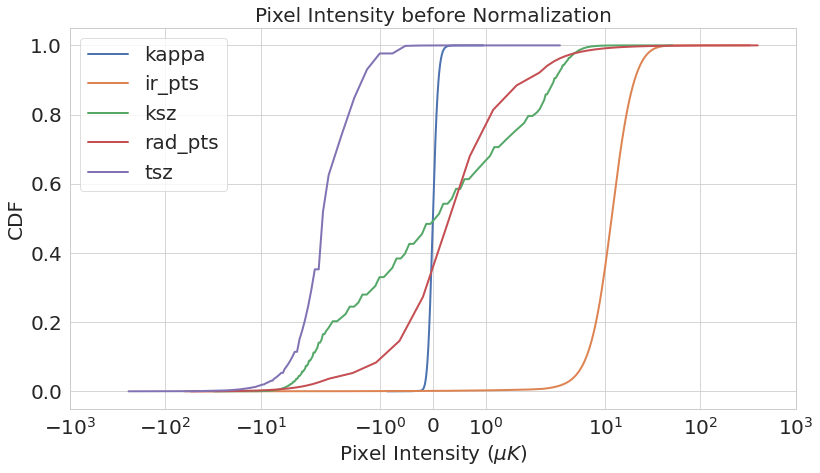

In [77]:

fig = plt.figure(figsize=(13, 7))
ax = fig.gca()
for key in hists_org.keys():
    hist = hists_org[key]['hist']
    bins = hists_org[key]["bin_centers"]
    nsum = np.sum(hist)
    hist = hist/nsum
    x = np.linspace(bins[0],bins[-1],len(hist))
    cdf = np.zeros(len(x ))
    for i, lmin in enumerate(x):
        loc = np.where(bins<lmin)
        cdf[i] = np.sum(hist[loc])    
    plt.plot(x, cdf, label=key, alpha=1, lw=2)
plt.title("Pixel Intensity before Normalization", fontsize=20)
plt.xlabel(r"Pixel Intensity ($\mu K$)", fontsize=20)
plt.ylabel("CDF", fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.tick_params(axis='both', which='minor', labelsize=20)
plt.legend(fontsize=20)
plt.ylim(-0.05,1.05)
plt.xlim(-1e3,1e3)
plt.xscale("symlog")
plt.yscale("linear")
plt.show()

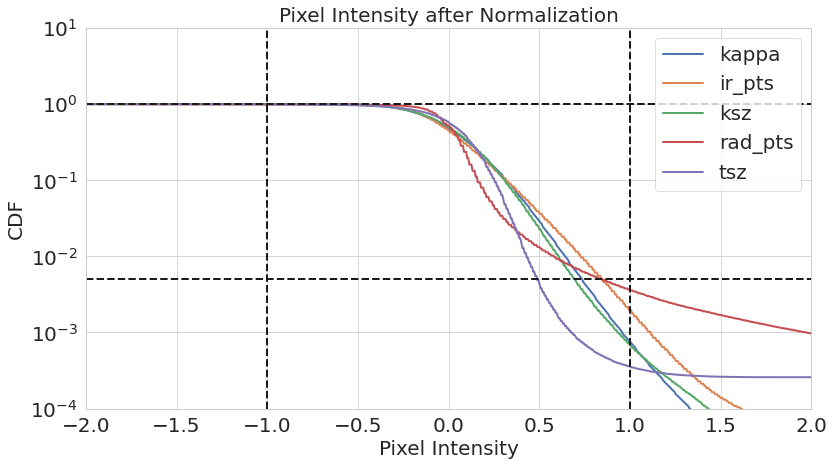

In [78]:
fig = plt.figure(figsize=(13, 7))
ax = fig.gca()
for key in hists_norm.keys():
    hist = hists_norm[key]['hist']
    bins = hists_norm[key]["bin_centers"]
    nsum = np.sum(hist)
    hist = hist/nsum
    x = np.linspace(-3,3,len(hist))
    cdf = np.zeros(len(x))
    for i, lmin in enumerate(x):
        loc = np.where(bins<lmin)
        cdf[i] = np.sum(hist[loc])
    #std = norm_info[key]["std"]

    plt.plot(x, 1-cdf, label=key, alpha=1, lw=2)
plt.title("Pixel Intensity after Normalization", fontsize=20)
plt.xlabel("Pixel Intensity", fontsize=20)
plt.ylabel("CDF", fontsize=20)
plt.xlim(-2,2)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.tick_params(axis='both', which='minor', labelsize=20)
plt.legend(fontsize=20)
plt.ylim(1e-4,10)
#plt.ylim(0.99,1.01)
plt.axvline(x=1, ls="--", lw=2, color="k")
plt.axvline(x=-1, ls="--", lw=2, color="k")
plt.axhline(y=5e-3, ls="--", lw=2, color="k")
plt.axhline(y=0.9975, ls="--", lw=2, color="k")
plt.yscale("log")
plt.show()

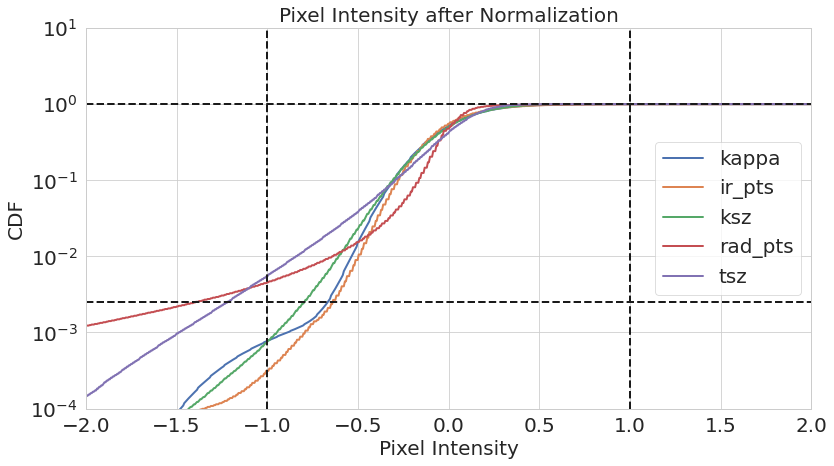

In [79]:
fig = plt.figure(figsize=(13, 7))
ax = fig.gca()
for key in hists_norm.keys():
    hist = hists_norm[key]['hist']
    bins = hists_norm[key]["bin_centers"]
    nsum = np.sum(hist)
    hist = hist/nsum
    x = np.linspace(-3,3,len(hist))
    cdf = np.zeros(len(x))
    for i, lmin in enumerate(x):
        loc = np.where(bins<lmin)
        cdf[i] = np.sum(hist[loc])
    #std = norm_info[key]["std"]

    plt.plot(x, cdf, label=key, alpha=1, lw=2)
plt.title("Pixel Intensity after Normalization", fontsize=20)
plt.xlabel("Pixel Intensity", fontsize=20)
plt.ylabel("CDF", fontsize=20)
plt.xlim(-2,2)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.tick_params(axis='both', which='minor', labelsize=20)
plt.legend(fontsize=20)
plt.ylim(1e-4,10)
#plt.ylim(0.99,1.01)
plt.axvline(x=1, ls="--", lw=2, color="k")
plt.axvline(x=-1, ls="--", lw=2, color="k")
plt.axhline(y=2.5e-3, ls="--", lw=2, color="k")
plt.axhline(y=0.995, ls="--", lw=2, color="k")
plt.yscale("log")
plt.show()

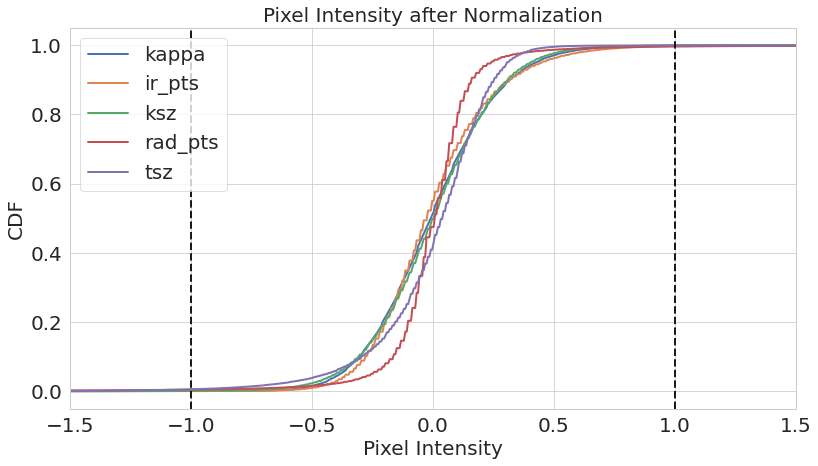

In [80]:
fig = plt.figure(figsize=(13, 7))
ax = fig.gca()
for key in hists_norm.keys():
    hist = hists_norm[key]['hist']
    bins = hists_norm[key]["bin_centers"]
    nsum = np.sum(hist)
    hist = hist/nsum
    x = np.linspace(-3,3,len(hist))
    cdf = np.zeros(len(x))
    for i, lmin in enumerate(x):
        loc = np.where(bins<lmin)
        cdf[i] = np.sum(hist[loc])    
    plt.plot(x, cdf, label=key, alpha=1, lw=2)
plt.title("Pixel Intensity after Normalization", fontsize=20)
plt.xlabel("Pixel Intensity", fontsize=20)
plt.ylabel("CDF", fontsize=20)
plt.xlim(-1.5,1.5)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.tick_params(axis='both', which='minor', labelsize=20)
plt.legend(fontsize=20)
plt.ylim(-0.05,1.05)
plt.axvline(x=1, ls="--", lw=2, color="k")
plt.axvline(x=-1, ls="--", lw=2, color="k")
plt.yscale("linear")
plt.show()

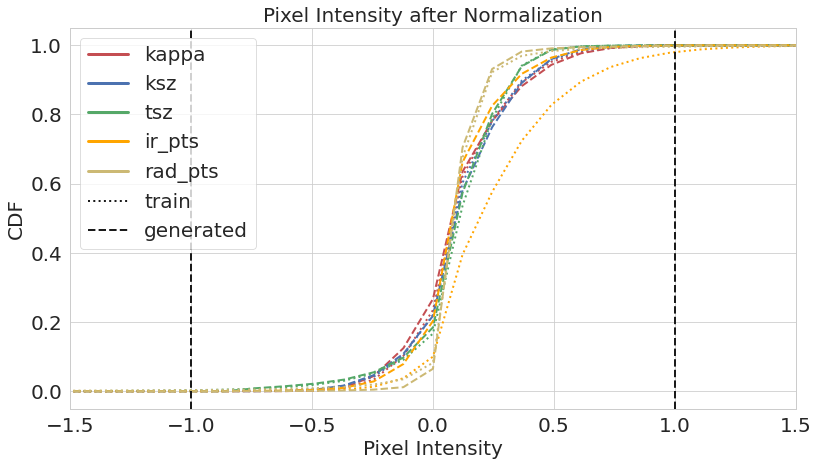

In [82]:
train = utils.load_data("/home/dwhan89/workspace/cosmikyu/data/sehgal/normalized_histogram_trainv3.npz")
generated = utils.load_data("/home/dwhan89/workspace/cosmikyu/data/sehgal/normalized_histogram_generated_100epochsv2.npz")
fig = plt.figure(figsize=(13, 7))
ax = fig.gca()
color = ['r','b','g','orange','y']
ctr = 0
compts = ["kappa", "ksz", "tsz", "ir_pts", "rad_pts"]
for key in compts:
    hist_train = train[key]['hist']
    bins_train = train[key]["bin_centers"]
    nsum_trian = np.sum(hist_train)
    hist_train = hist_train/nsum_trian
    x = np.linspace(-6,6,len(hist_train))
    cdf = np.zeros(len(x))
    for i, lmin in enumerate(x):
        loc = np.where(bins_train<lmin)
        cdf[i] = np.sum(hist_train[loc])    
    plt.plot(x, cdf, alpha=1, ls=":", lw=2, color=color[ctr])
    
    hist_generated = generated[key]['hist']
    bins_generated = generated[key]["bin_centers"]
    nsum_generated = np.sum(hist_generated)
    hist_generated = hist_generated/nsum_generated
    x = np.linspace(-6,6,len(hist_generated))
    cdf = np.zeros(len(x))
    for i, lmin in enumerate(x):
        loc = np.where(bins_generated<lmin)
        cdf[i] = np.sum(hist_generated[loc])    
    plt.plot(x, cdf, alpha=1, lw=2, ls="--", color=color[ctr])
    ctr += 1
    
ctr = 0
for key in compts:
    plt.plot([], [], label=key, alpha=1, ls="-", lw=3, color=color[ctr])
    ctr += 1

plt.plot([], [], label="train", ls=":", lw=2, color="k")
plt.plot([], [], label="generated", ls="--", lw=2, color="k")
    
plt.title("Pixel Intensity after Normalization", fontsize=20)
plt.xlabel("Pixel Intensity", fontsize=20)
plt.ylabel("CDF", fontsize=20)
plt.xlim(-1.5,1.5)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.tick_params(axis='both', which='minor', labelsize=20)
plt.legend(fontsize=20)
plt.ylim(-0.05,1.05)
plt.axvline(x=1, ls="--", lw=2, color="k")
plt.axvline(x=-1, ls="--", lw=2, color="k")
plt.yscale("linear")
plt.show()

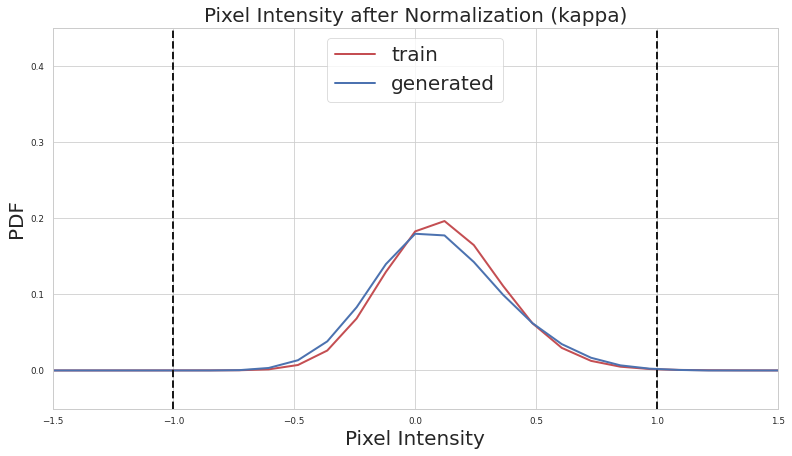

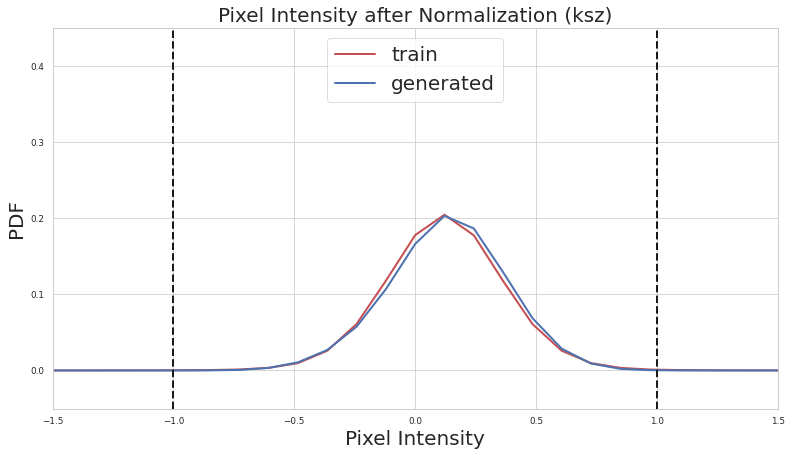

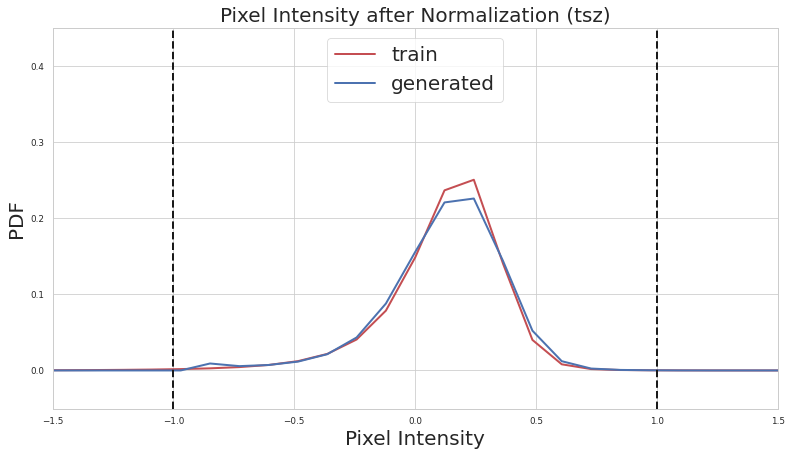

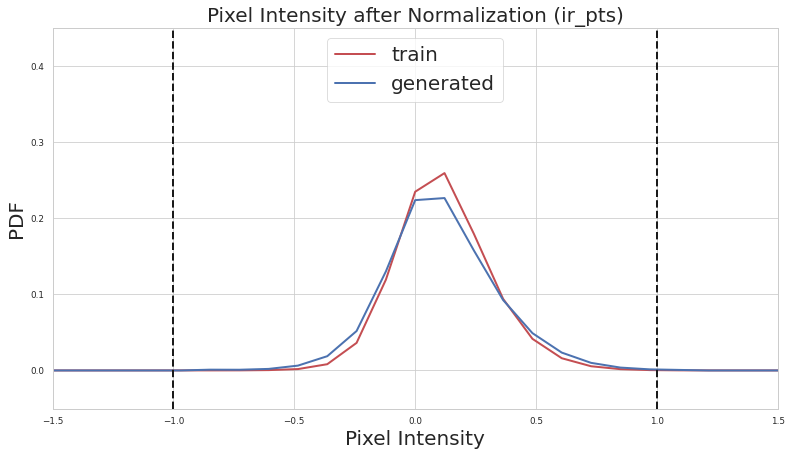

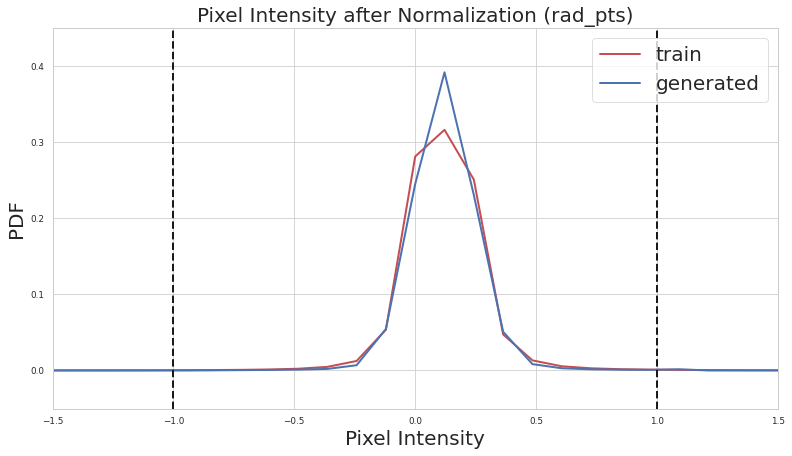

In [5]:
ax = fig.gca()
compts = ["kappa", "ksz", "tsz", "ir_pts", "rad_pts"]
for key in compts:
    fig = plt.figure(figsize=(13, 7))
    hist_train = train[key]['hist']
    bins_train = train[key]["bin_centers"]
    nsum_trian = np.sum(hist_train)
    hist_train = hist_train/nsum_trian   
    plt.plot(bins_train, hist_train, alpha=1, ls="-", lw=2, color="r")
    
    hist_generated = generated[key]['hist']
    bins_generated = generated[key]["bin_centers"]
    nsum_generated = np.sum(hist_generated)
    hist_generated = hist_generated/nsum_generated   
    plt.plot(bins_generated, hist_generated, alpha=1, lw=2, ls="-", color="b")
    
    '''
    hist_generated100 = generated100[key]['hist']
    bins_generated100 = generated100[key]["bin_centers"]
    nsum_generated100 = np.sum(hist_generated100)
    hist_generated100 = hist_generated100/nsum_generated100   
    plt.plot(bins_generated100, hist_generated100, alpha=1, lw=2, ls="-", color="g")
    '''
    
    plt.plot([], [], label="train", ls="-", lw=2, color="r")
    plt.plot([], [], label="generated", ls="-", lw=2, color="b")

    plt.title("Pixel Intensity after Normalization (%s)"%key, fontsize=20)
    plt.xlabel("Pixel Intensity", fontsize=20)
    plt.ylabel("PDF", fontsize=20)
    plt.xlim(-1.5,1.5)
    ax.tick_params(axis='both', which='major', labelsize=20)
    ax.tick_params(axis='both', which='minor', labelsize=20)
    plt.legend(fontsize=20)
    plt.ylim(-0.05,0.45)
    plt.axvline(x=1, ls="--", lw=2, color="k")
    plt.axvline(x=-1, ls="--", lw=2, color="k")
    plt.yscale("linear")
    plt.show()



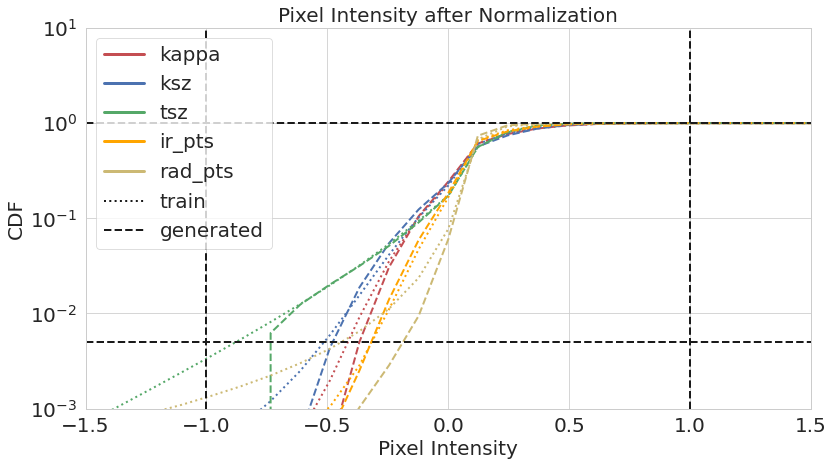

In [61]:
train = utils.load_data("/home/dwhan89/workspace/cosmikyu/data/sehgal/normalized_histogram_train.npz")
generated = utils.load_data("/home/dwhan89/workspace/cosmikyu/data/sehgal/normalized_histogram_generated.npz")
fig = plt.figure(figsize=(13, 7))
ax = fig.gca()
color = ['r','b','g','orange','y']
ctr = 0
compts = ["kappa", "ksz", "tsz", "ir_pts", "rad_pts"]
for key in compts:
    hist_train = train[key]['hist']
    bins_train = train[key]["bin_centers"]
    nsum_trian = np.sum(hist_train)
    hist_train = hist_train/nsum_trian
    x = np.linspace(-6,6,len(hist_train))
    cdf = np.zeros(len(x))
    for i, lmin in enumerate(x):
        loc = np.where(bins_train<lmin)
        cdf[i] = np.sum(hist_train[loc])    
    plt.plot(x, cdf, alpha=1, ls=":", lw=2, color=color[ctr])
    
    hist_generated = generated[key]['hist']
    bins_generated = generated[key]["bin_centers"]
    nsum_generated = np.sum(hist_generated)
    hist_generated = hist_generated/nsum_generated
    x = np.linspace(-6,6,len(hist_generated))
    cdf = np.zeros(len(x))
    for i, lmin in enumerate(x):
        loc = np.where(bins_generated<lmin)
        cdf[i] = np.sum(hist_generated[loc])    
    plt.plot(x, cdf, alpha=1, lw=2, ls="--", color=color[ctr])
    ctr += 1
    
ctr = 0
for key in compts:
    plt.plot([], [], label=key, alpha=1, ls="-", lw=3, color=color[ctr])
    ctr += 1

plt.plot([], [], label="train", ls=":", lw=2, color="k")
plt.plot([], [], label="generated", ls="--", lw=2, color="k")
    
plt.title("Pixel Intensity after Normalization", fontsize=20)
plt.xlabel("Pixel Intensity", fontsize=20)
plt.ylabel("CDF", fontsize=20)
plt.xlim(-1.5,1.5)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.tick_params(axis='both', which='minor', labelsize=20)
plt.legend(fontsize=20)
plt.ylim(1e-3,10)
#plt.ylim(0.99,1.01)
plt.axvline(x=1, ls="--", lw=2, color="k")
plt.axvline(x=-1, ls="--", lw=2, color="k")
plt.axhline(y=5e-3, ls="--", lw=2, color="k")
plt.axhline(y=0.995, ls="--", lw=2, color="k")
plt.yscale("log")
plt.show()

/home/dwhan89/.miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in true_divide
/home/dwhan89/.miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in true_divide
/home/dwhan89/.miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in true_divide
/home/dwhan89/.miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in true_divide
/home/dwhan89/.miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in true_divide


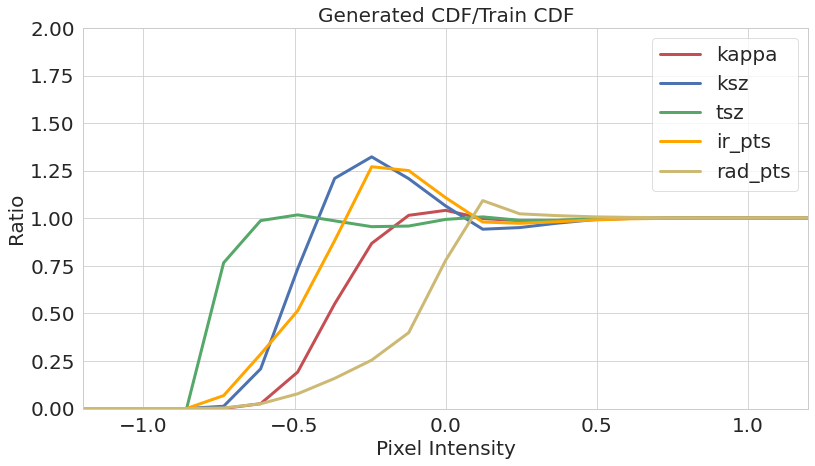

In [62]:
train = utils.load_data("/home/dwhan89/workspace/cosmikyu/data/sehgal/normalized_histogram_train.npz")
generated = utils.load_data("/home/dwhan89/workspace/cosmikyu/data/sehgal/normalized_histogram_generated.npz")
fig = plt.figure(figsize=(13, 7))
ax = fig.gca()
color = ['r','b','g','orange','y']
ctr = 0
compts = ["kappa", "ksz", "tsz", "ir_pts", "rad_pts"]
for key in compts:
    hist_train = train[key]['hist']
    bins_train = train[key]["bin_centers"]
    nsum_trian = np.sum(hist_train)
    hist_train = hist_train/nsum_trian
    x = np.linspace(-6,6,len(hist_train))
    cdf_train = np.zeros(len(x))
    for i, lmin in enumerate(x):
        loc = np.where(bins_train<lmin)
        cdf_train[i] = np.sum(hist_train[loc])    
    #plt.plot(x, cdf, alpha=1, ls=":", lw=2, color=color[ctr])
    
    hist_generated = generated[key]['hist']
    bins_generated = generated[key]["bin_centers"]
    nsum_generated = np.sum(hist_generated)
    hist_generated = hist_generated/nsum_generated
    x = np.linspace(-6,6,len(hist_generated))
    cdf_generated = np.zeros(len(x))
    for i, lmin in enumerate(x):
        loc = np.where(bins_generated<lmin)
        cdf_generated[i] = np.sum(hist_generated[loc])    
    plt.plot(x, cdf_generated/cdf_train, alpha=1, lw=3, ls="-", color=color[ctr])
    ctr += 1
    
ctr = 0
for key in compts:
    plt.plot([], [], label=key, alpha=1, ls="-", lw=3, color=color[ctr])
    ctr += 1
 
plt.title("Generated CDF/Train CDF", fontsize=20)
plt.xlabel("Pixel Intensity", fontsize=20)
plt.ylabel("Ratio", fontsize=20)
plt.xlim(-1.2,1.2)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.tick_params(axis='both', which='minor', labelsize=20)
plt.legend(fontsize=20)
plt.ylim(0,2)
#plt.ylim(1e-3,10)
plt.show()

/home/dwhan89/workspace/cosmikyu/data/sehgal/spectra_full_lmax10000_20mjy.npz


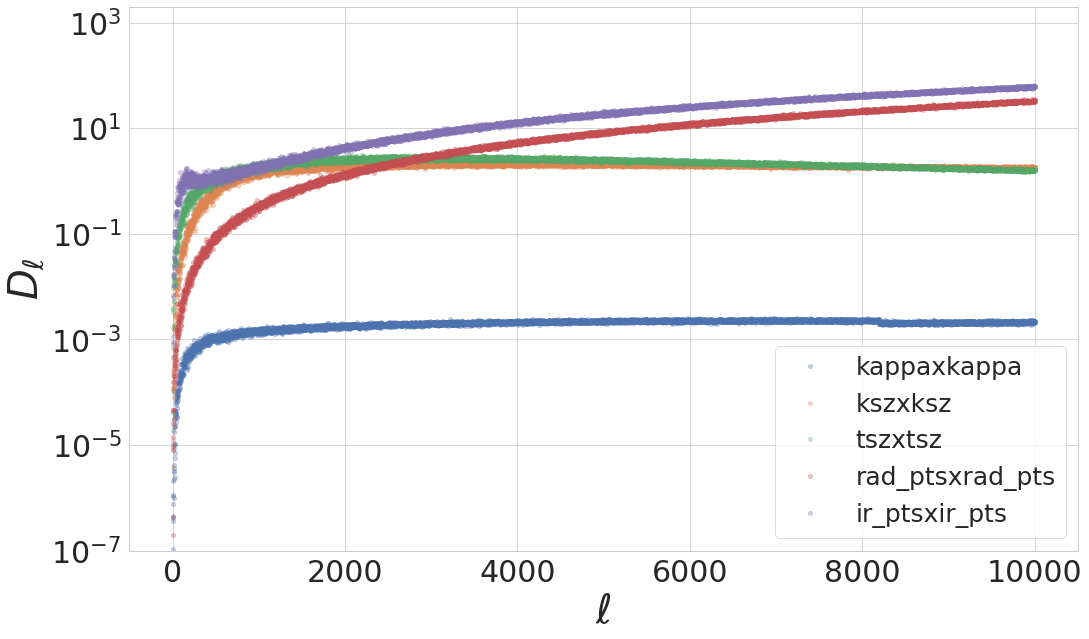

/home/dwhan89/.miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:65: RuntimeWarning: invalid value encountered in true_divide
/home/dwhan89/.miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:65: RuntimeWarning: invalid value encountered in true_divide
/home/dwhan89/.miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:65: RuntimeWarning: invalid value encountered in true_divide
/home/dwhan89/.miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:65: RuntimeWarning: invalid value encountered in true_divide


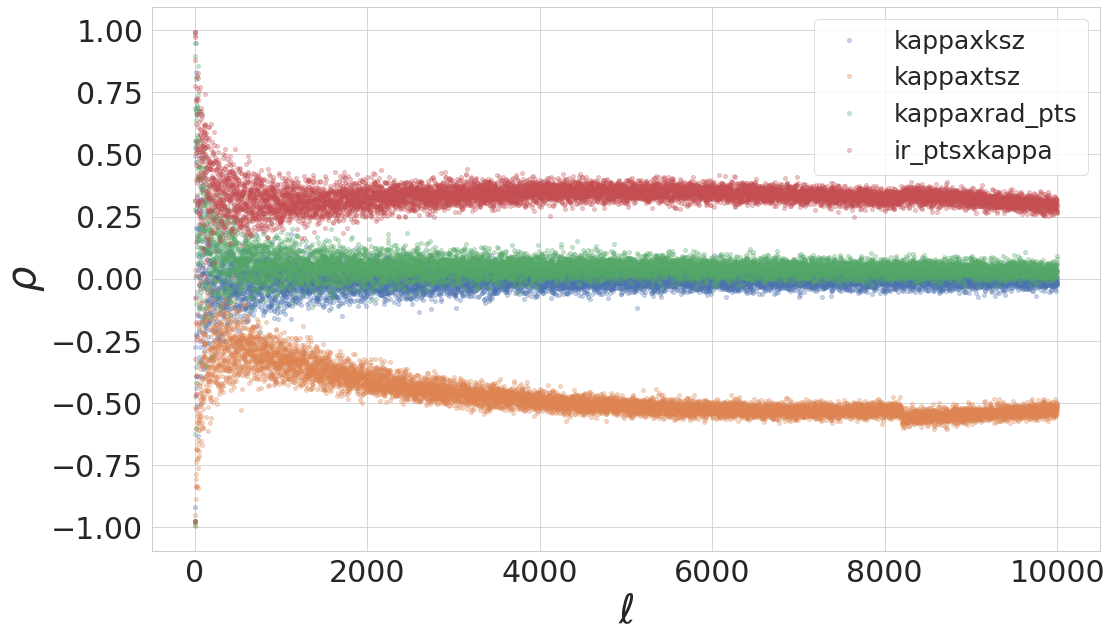

/home/dwhan89/.miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:65: RuntimeWarning: invalid value encountered in true_divide
/home/dwhan89/.miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:65: RuntimeWarning: invalid value encountered in true_divide
/home/dwhan89/.miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:65: RuntimeWarning: invalid value encountered in true_divide


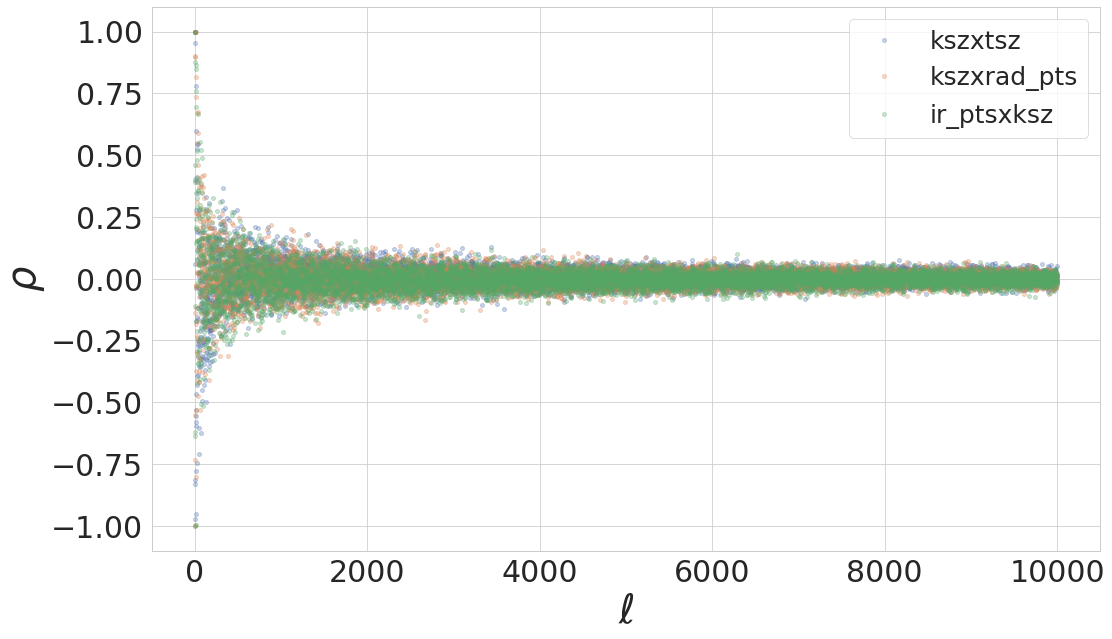

/home/dwhan89/.miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:65: RuntimeWarning: invalid value encountered in true_divide
/home/dwhan89/.miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:65: RuntimeWarning: invalid value encountered in true_divide


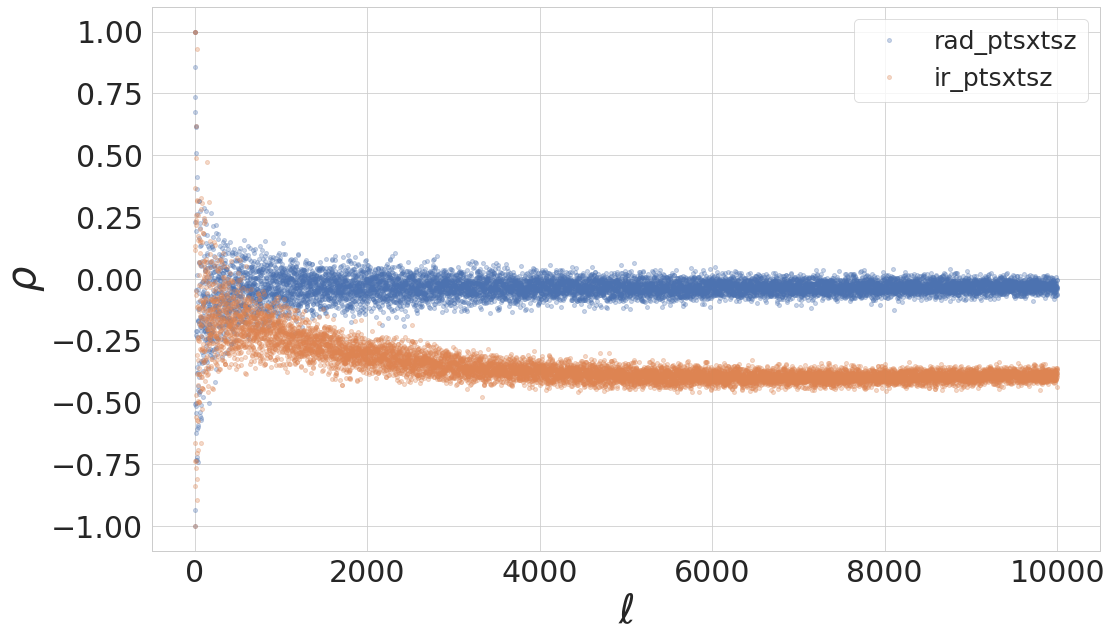

/home/dwhan89/.miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:65: RuntimeWarning: invalid value encountered in true_divide


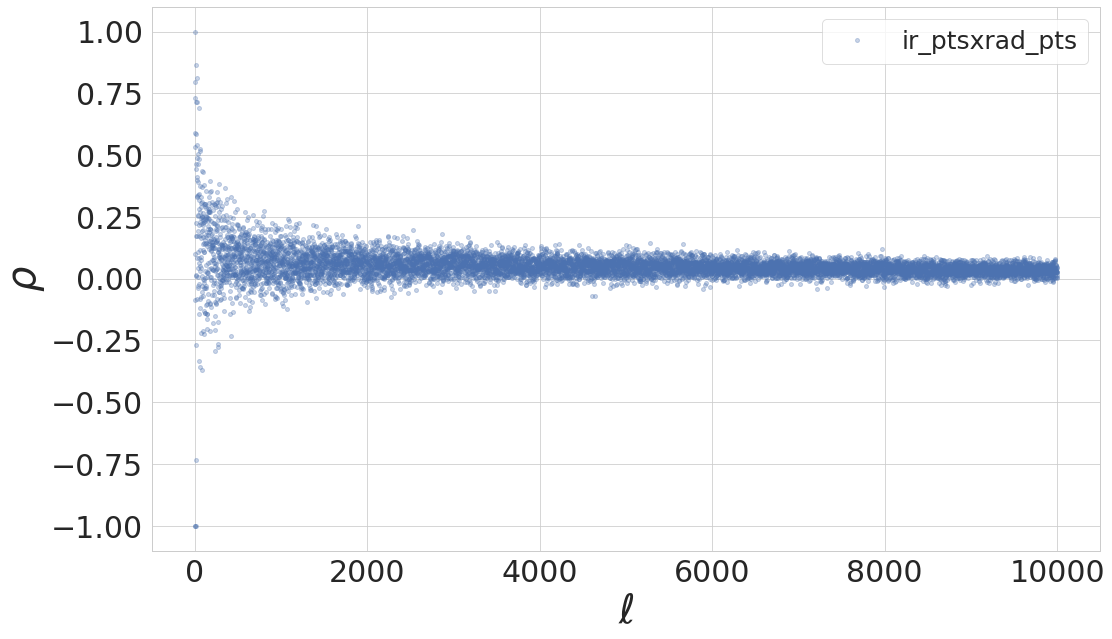

In [3]:
print(data_path("spectra_full_lmax10000_20mjy.npz"))
spectra = np.load(data_path("spectra_full_lmax10000_20mjy.npz"))
#spectra = {}
#np.savez(data_path("spectra_full_lmax10000_20mjy.npz"), **spectra)
def get_spectra(key1, key2, spectra=spectra):
    key = [key1, key2]
    key.sort()
    key = "x".join(key)
    if key in spectra:
        l = spectra["l"].copy()
        dls = spectra[key].copy()
    else:
        print("taking {}".format(key))
        sehgal_dir = "/home/dwhan89/scratch/data/sehgal_et_al_sims/cosmo_sim_maps/July2009/inputs/microwaveSky_20mjy/"
        SEHGAL10 = sehgal.SehgalSky2010(path=sehgal_dir, data_type='alm', unit="thermo")
        rfs = {"kappa": lambda : SEHGAL10.get_kappa(),
               "ksz": lambda : SEHGAL10.get_ksz(148),
               "tsz": lambda :SEHGAL10.get_tsz(148),
               "rad_pts": lambda :SEHGAL10.get_radio(148),
               "ir_pts": lambda :SEHGAL10.get_cib(148)
              }
        alm1 = np.complex128(rfs[key1]())
        alm2 = np.complex128(rfs[key2]())
        cl = hp.alm2cl(alm1, alm2)
        l = np.arange(len(cl))
        l_fact = l*(l+1)/(2*np.pi)
        dls = l_fact*cl
        spectra["l"] = np.arange(len(cl))
        spectra[key] = dls
    return (l, dls)

fig = plt.figure(figsize=(17,10))
ax = fig.gca()
compts = ["kappa", "ksz", "tsz", "rad_pts", "ir_pts"]
for key1 in compts:
    key2 = key1
    key = [key1, key2]
    key.sort()
    key = "x".join(key)
    l, dls= get_spectra(key1, key2)
    plt.plot(l, dls, alpha=0.3, label=key, ls="", marker="o", markersize=4)
ax.tick_params(axis='both', which='major', labelsize=30)
ax.tick_params(axis='both', which='minor', labelsize=30)
plt.ylabel(r"$D_\ell$", fontsize=40)
plt.xlabel(r"$\ell$", fontsize=40)
plt.legend(fontsize=25)
plt.ylim(1e-7,2e3)
plt.yscale("log")
plt.show()


compts = ["kappa", "ksz", "tsz", "rad_pts", "ir_pts"]
for i in range(5-1):
    fig = plt.figure(figsize=(17,10))
    ax = fig.gca()
    for j in range(i+1,5):
        key1 = compts[i]
        key2 = compts[j]
        key = [key1, key2]
        key.sort()
        key = "x".join(key)
        l, dls_x= get_spectra(key1, key2)
        _, dls_1= get_spectra(key1, key1)
        _, dls_2= get_spectra(key2, key2)
        rho = dls_x/np.sqrt(dls_1*dls_2)
        plt.plot(l, rho, alpha=0.3, label=key, ls="", marker="o", markersize=4)
    ax.tick_params(axis='both', which='major', labelsize=30)
    ax.tick_params(axis='both', which='minor', labelsize=30)
    plt.ylabel(r"$\rho$", fontsize=40)
    plt.xlabel(r"$\ell$", fontsize=40)
    plt.legend(fontsize=25)
    plt.show()
#np.savez(data_path("spectra_full_lmax10000_20mjy.npz"), **spectra)
